<a href="https://colab.research.google.com/github/source-droid/Machine-Learning-based-Automatic-Covid-19-detection-using-Lung-s-Scans/blob/main/wavelet_trfrm_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import pywt
import pywt.data
import random
from tensorflow.keras.utils import to_categorical

import sklearn.metrics as metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.layers.normalization import BatchNormalization

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

## Clone Dataset

In [ ]:
# Cloning Dataset into Colab
! git clone https://github.com/source-droid/This-is-splitted-for-COVID-and-NORMAL-Only.git

Cloning into 'This-is-splitted-for-COVID-and-NORMAL-Only'...
remote: Enumerating objects: 3013, done.
remote: Total 3013 (delta 0), reused 0 (delta 0), pack-reused 3013
Receiving objects: 100% (3013/3013), 1.71 GiB | 33.39 MiB/s, done.
Checking out files: 100% (3005/3005), done.


# Reading the Training images


In [ ]:
size = 256

In [ ]:
#Reading Training Images For Covid and Normal
import numpy as np 
import glob 
import cv2 
path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Covid/*.*")
cv_img = []
for img in path_l:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    #img = mpimg.imread('/content/lena.bmp') # Reading the Image
    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.
 
    n = cv2.resize(cA,(size,size))

    # n = np.array(n)
    # n = n.flatten() 
    cv_img.append(n) 


arrayl = np.asarray(cv_img[0:500])
arrayl = np.stack([arrayl, arrayl, arrayl], axis=-1) # Stack of Data to make RGB
print(arrayl.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/train/Normal/*.*")
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    #img = mpimg.imread('/content/lena.bmp') # Reading the Image
    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.

    n = cv2.resize(cA,(size,size))

    # n = np.array(n)
    # n = n.flatten() 
    cv_img.append(n) 

array2 = np.asarray(cv_img[0:500]) 
array2 = np.stack([array2, array2, array2], axis=-1) # Stack of Data to make RGB
print(array2.shape) 

(500, 256, 256, 3)
(500, 256, 256, 3)


# Reading the Testing images


In [ ]:
# Reading Testing Images For Covid and Normal
import numpy as np 
import glob
import cv2 

path_l = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Covid/*.*") 
cv_img = [] 
for img in path_l:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    #img = mpimg.imread('/content/lena.bmp') # Reading the Image
    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.

    n = cv2.resize(cA,(size,size))
    # n = np.array(n)
    # n = n.flatten() 
    cv_img.append(n) 

array3 = np.asarray(cv_img[0:50]) 
array3 = np.stack([array3, array3, array3], axis=-1) # Stack of Data to make RGB
print(array3.shape) 

path_2 = glob.glob("/content/This-is-splitted-for-COVID-and-NORMAL-Only/test/Normal/*.*") 
cv_img = []
for img in path_2:
    n = cv2.imread(img)
    
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY) # converting image Into Grayscale for Wavelet 
    # as opencv loads in BGR format by default, we want to show it in Grayscale.

    #img = mpimg.imread('/content/lena.bmp') # Reading the Image
    coeffs2 = pywt.dwt2(n, 'db3', mode = 'periodization') # 1 level DWT. Applying wavelet
    cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.

    n = cv2.resize(cA,(size,size))

    # n = np.array(n)
    # n = n.flatten() 
    cv_img.append(n) 

array4 = np.asarray(cv_img[0:50])
array4 = np.stack([array4, array4, array4], axis=-1) # Stack of Data to make RGB
print(array4.shape) 


(50, 256, 256, 3)
(50, 256, 256, 3)


# Concatenating Covid and Normal arrays into one variable for train and test:

In [ ]:
# Concatenating Covid and Normal arrays into one variable for train and test:
Xtrain = np.concatenate((arrayl,array2))

Xtest = np.concatenate((array3,array4))

Xtrain.shape , Xtest.shape 

((1000, 256, 256, 3), (100, 256, 256, 3))

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

In [ ]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for training data:

labels0 = np.zeros(len(arrayl)) 
labels1 = np.ones(len(array2)) 
print('Normal labels : ',labels0 ,'Covid labels : ', labels1) 
len(labels0) , len(labels1) 


Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

(500, 500)

# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

In [ ]:
# Creating labels for Normal and Covid 0 and 1 respectively equal to length of data for testing data:

labels0s = np.zeros(len(array3)) 
labels1s = np.ones(len(array4)) 
print('Normal labels : ',labels0s ,'Covid labels : ', labels1s) 
len(labels0s) , len(labels1s) 

Normal labels :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] Covid labels :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


(50, 50)

# Concatenating the labels for Covid and Normal for training and testing:

In [ ]:
# Concatenating the labels for Covid and Normal for training and testing:
ytrain = np.concatenate((labels0,labels1)) 
ytest = np.concatenate((labels0s,labels1s)) 
ytrain.shape, ytest.shape 


((1000,), (100,))

# Splitting the dataset for validation data:

In [ ]:
# Splitting the dataset for validation data:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(Xtrain,ytrain,test_size = 0.2, shuffle = True) 
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape 


((800, 256, 256, 3), (200, 256, 256, 3), (800,), (200,))

# Normalizing the data from 0 to 255 to 0 to 1:

In [ ]:
# Normalizing the data from 0 to 255 to 0 to 1:

# X_train = X_train.reshape(X_train.shape[0], size, size, 1)
# Xtest = Xtest.reshape(Xtest.shape[0], size, size, 1)
# X_valid = X_valid.reshape(X_valid.shape[0], size, size, 1)

# X_train = X_train.astype('float32')
# Xtest = Xtest.astype('float32')
# X_valid = X_valid.astype('float32')

X_train_norm = X_train/255 
X_valid_norm = X_valid/255
Xtest_norm = Xtest/255 


In [ ]:
X_train_norm.shape

(800, 256, 256, 3)

# AlexNet
![Alexnet](https://neurohive.io/wp-content/uploads/2018/10/AlexNet-1.png)

In [ ]:
Alexnet=Sequential()

#1 conv layer
Alexnet.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(size,size,3)))

#1 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())

#2 conv layer
Alexnet.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())

#3 conv layer
Alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
Alexnet.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
Alexnet.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
Alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

Alexnet.add(BatchNormalization())


Alexnet.add(Flatten())

#1 dense layer
Alexnet.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#2 dense layer
Alexnet.add(Dense(4096,activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#3 dense layer
Alexnet.add(Dense(1000,activation="relu"))

Alexnet.add(Dropout(0.4))

Alexnet.add(BatchNormalization())

#output layer
Alexnet.add(Dense(1,activation="sigmoid"))

Alexnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 384)       8

## Layers of Alexnet

In [ ]:
for i, layer in enumerate(Alexnet.layers):
    print(i, layer.name)

0 conv2d
1 max_pooling2d
2 batch_normalization
3 conv2d_1
4 max_pooling2d_1
5 batch_normalization_1
6 conv2d_2
7 conv2d_3
8 conv2d_4
9 max_pooling2d_2
10 batch_normalization_2
11 flatten
12 dense
13 dropout
14 batch_normalization_3
15 dense_1
16 dropout_1
17 batch_normalization_4
18 dense_2
19 dropout_2
20 batch_normalization_5
21 dense_3


In [ ]:
# compiling the Alexnet
Alexnet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

## Training the Alexnet

In [ ]:
%%time
# Fitting the Alexnet
alex = Alexnet.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
25/25 [==============================] - 37s 107ms/step - loss: 0.5830 - accuracy: 0.8115 - val_loss: 14.5283 - val_accuracy: 0.5100
Epoch 2/30
25/25 [==============================] - 1s 45ms/step - loss: 0.1417 - accuracy: 0.9600 - val_loss: 4.7532 - val_accuracy: 0.5200
Epoch 3/30
25/25 [==============================] - 1s 45ms/step - loss: 0.0478 - accuracy: 0.9805 - val_loss: 1.2676 - val_accuracy: 0.7200
Epoch 4/30
25/25 [==============================] - 1s 44ms/step - loss: 0.0746 - accuracy: 0.9786 - val_loss: 2.5107 - val_accuracy: 0.6450
Epoch 5/30
25/25 [==============================] - 1s 45ms/step - loss: 0.1091 - accuracy: 0.9700 - val_loss: 0.0875 - val_accuracy: 0.9700
Epoch 6/30
25/25 [==============================] - 1s 44ms/step - loss: 0.0509 - accuracy: 0.9766 - val_loss: 0.1369 - val_accuracy: 0.9650
Epoch 7/30
25/25 [==============================] - 1s 45ms/step - loss: 0.0529 - accuracy: 0.9799 - val_loss: 0.5645 - val_accuracy: 0.8950
Epoch 8/30

## Evaluating the Alexnet

In [ ]:
# Evaluating the Alexnet:
%%time
Alexnet.evaluate(Xtest_norm,ytest,verbose= 1)

4/4 [==============================] - 0s 59ms/step - loss: 0.4359 - accuracy: 0.9300
CPU times: user 230 ms, sys: 97.2 ms, total: 327 ms
Wall time: 323 ms


[0.43586504459381104, 0.9300000071525574]

## Accuracy and Loss Plot

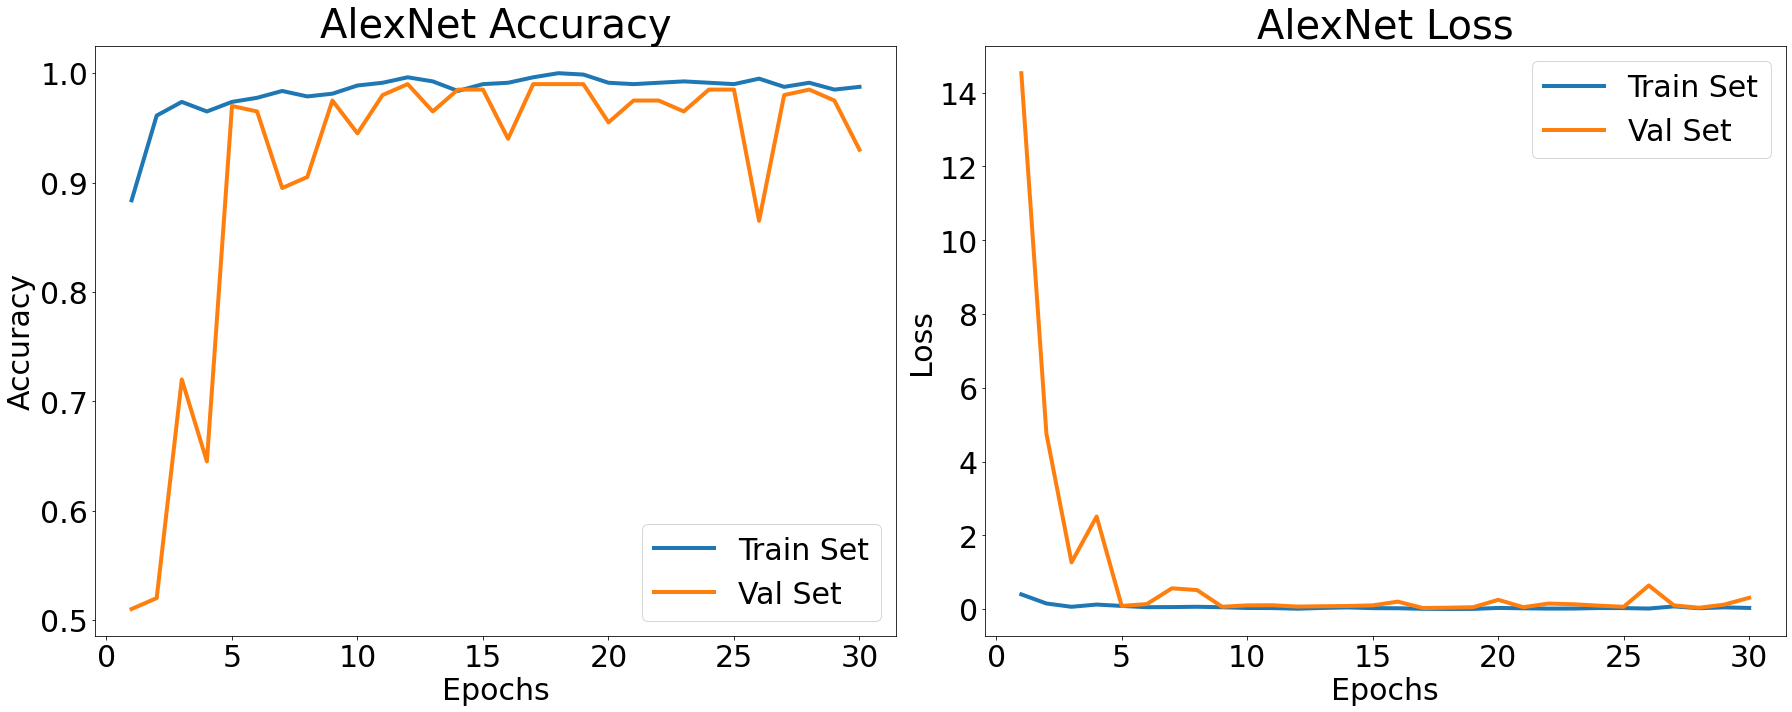

In [ ]:
# plot model performance
acc = alex.history['accuracy']
val_acc = alex.history['val_accuracy']
loss = alex.history['loss']
val_loss = alex.history['val_loss']
epochs_range = range(1, len(alex.epoch) + 1)

plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_acc, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('AlexNet Accuracy',fontsize=40)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_loss, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('AlexNet Loss',fontsize=40)

plt.tight_layout()
plt.show()

## Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 0s 13ms/step


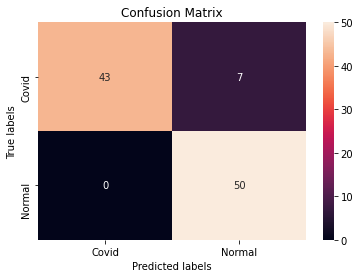

In [ ]:
pred  = Alexnet.predict_classes(Xtest_norm,verbose= 1)

import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);

## Performance Evaluation of Alexnet

In [ ]:
print("Accuracy:", metrics.accuracy_score(ytest, pred))
print("Precision:", metrics.precision_score(ytest, pred))
print("Recall:", metrics.recall_score(ytest, pred))
print("F1 Score:", metrics.f1_score(ytest, pred))
print("roc_auc_score:", metrics.roc_auc_score(ytest, pred))


tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
print('TN: ', tn)
print('FP: ', fp)
print('FN: ', fn)
print('TP: ', tp)

Accuracy: 0.93
Precision: 0.8771929824561403
Recall: 1.0
F1 Score: 0.9345794392523363
roc_auc_score: 0.9299999999999999
TN:  43
FP:  7
FN:  0
TP:  50


## ROC

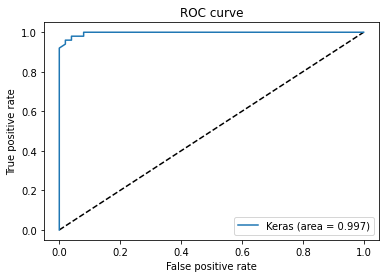

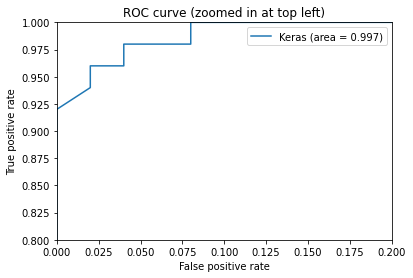

In [ ]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = Alexnet.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## Precision Recall Curve

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.935 auc=0.997


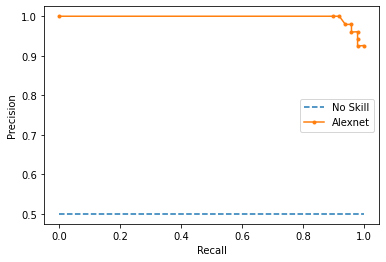

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = Alexnet.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Alexnet')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        50
         1.0       0.88      1.00      0.93        50

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100

normal = 1 , covid19 = 0


# ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array






res50 = Sequential()

res50.add(ResNet50(input_shape=(size,size,3),pooling='max', include_top=False, weights='imagenet'))

res50.add(Dense(1, activation='sigmoid'))

res50.layers[0].trainable = False
res50.summary()
res50.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


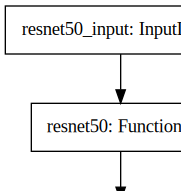

In [ ]:
plot_model(res50, to_file='res50.png')
SVG(model_to_dot(res50).create(prog='dot', format='svg'))

In [ ]:
%%time
# Fitting the Resnet
res = res50.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
25/25 [==============================] - 9s 216ms/step - loss: 1.7374 - accuracy: 0.5285 - val_loss: 0.4281 - val_accuracy: 0.9100
Epoch 2/30
25/25 [==============================] - 4s 156ms/step - loss: 0.4283 - accuracy: 0.7855 - val_loss: 0.3049 - val_accuracy: 0.9450
Epoch 3/30
25/25 [==============================] - 4s 155ms/step - loss: 0.2498 - accuracy: 0.9446 - val_loss: 0.2112 - val_accuracy: 0.9450
Epoch 4/30
25/25 [==============================] - 4s 157ms/step - loss: 0.2166 - accuracy: 0.9288 - val_loss: 0.1706 - val_accuracy: 0.9700
Epoch 5/30
25/25 [==============================] - 4s 159ms/step - loss: 0.1654 - accuracy: 0.9512 - val_loss: 0.1598 - val_accuracy: 0.9700
Epoch 6/30
25/25 [==============================] - 4s 160ms/step - loss: 0.1481 - accuracy: 0.9624 - val_loss: 0.1308 - val_accuracy: 0.9700
Epoch 7/30
25/25 [==============================] - 4s 162ms/step - loss: 0.1312 - accuracy: 0.9627 - val_loss: 0.1180 - val_accuracy: 0.9700
Epoch 

## Evaluating the ResNet

In [ ]:
# Evaluating the Resnet:
%%time
res50.evaluate(Xtest_norm,ytest,verbose= 1)

4/4 [==============================] - 1s 235ms/step - loss: 0.0551 - accuracy: 0.9800
CPU times: user 493 ms, sys: 212 ms, total: 706 ms
Wall time: 913 ms


[0.05508886277675629, 0.9800000190734863]

## Accuracy and Loss Plot

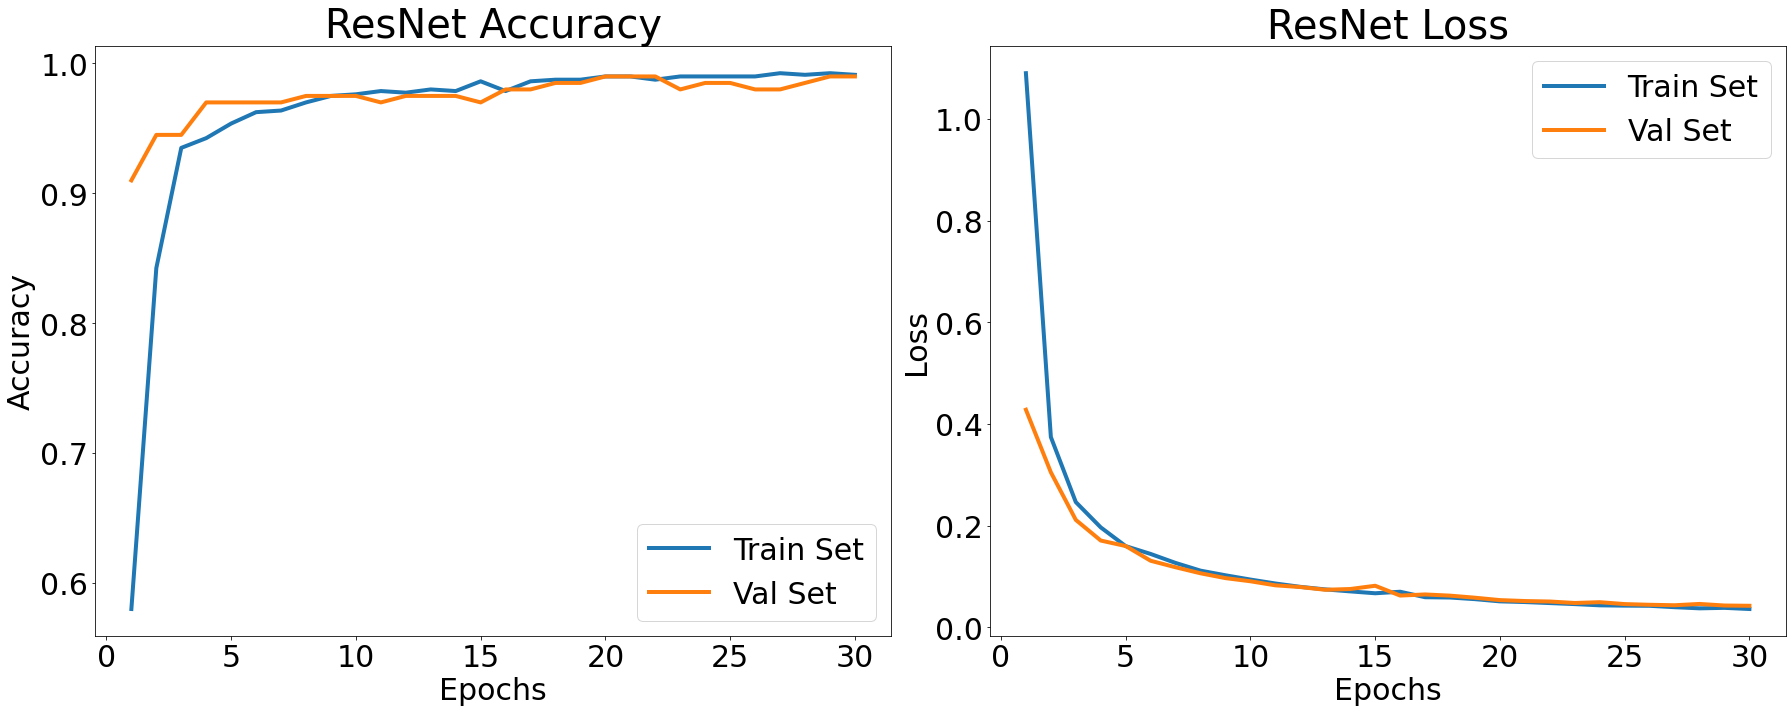

In [ ]:
# plot the model accuracy and loss for the training and the validating set.
# CNN Model
# plot model performance
acc = res.history['accuracy']
val_acc = res.history['val_accuracy']
loss = res.history['loss']
val_loss = res.history['val_loss']
epochs_range = range(1, len(res.epoch) + 1)

plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_acc, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('ResNet Accuracy',fontsize=40)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_loss, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('ResNet Loss',fontsize=40)

plt.tight_layout()
plt.show()

## Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 1s 114ms/step


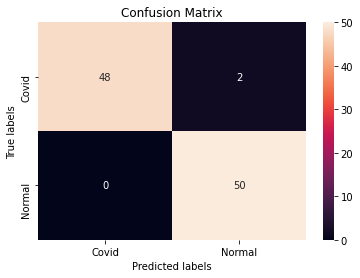

In [ ]:
pred  = res50.predict_classes(Xtest_norm,verbose= 1)

import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);

## Performance Evaluation of Alexnet

In [ ]:
print("Accuracy:", metrics.accuracy_score(ytest, pred))
print("Precision:", metrics.precision_score(ytest, pred))
print("Recall:", metrics.recall_score(ytest, pred))
print("F1 Score:", metrics.f1_score(ytest, pred))
print("roc_auc_score:", metrics.roc_auc_score(ytest, pred))


tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
print('TN: ', tn)
print('FP: ', fp)
print('FN: ', fn)
print('TP: ', tp)

Accuracy: 0.98
Precision: 0.9615384615384616
Recall: 1.0
F1 Score: 0.9803921568627451
roc_auc_score: 0.98
TN:  48
FP:  2
FN:  0
TP:  50


## ROC

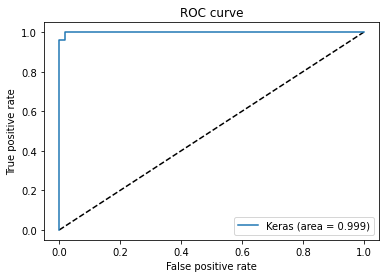

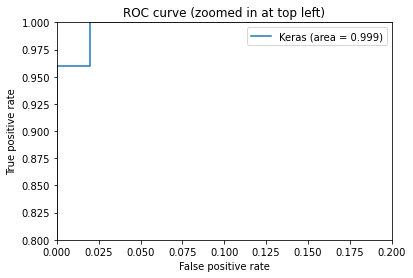

In [ ]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = res50.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## Precision Recall Curve

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=0.980 auc=0.999


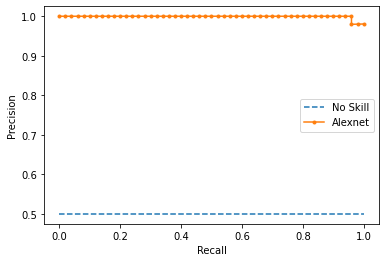

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = res50.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Alexnet')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        50
         1.0       0.96      1.00      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

normal = 1 , covid19 = 0


# DenseNet-121

In [ ]:
""" USE DenseNet121"""
from tensorflow.keras.applications import DenseNet121
DenseNet = DenseNet121(input_shape=(size,size,3),pooling='max', include_top=False, weights='imagenet')
for layer in DenseNet.layers[:149]:
    layer.trainable = False
for layer in DenseNet.layers[149:]:
    layer.trainable = True

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
Densenet_121 = Sequential()

Densenet_121.add(DenseNet)
Densenet_121.add(Dense(1, activation='sigmoid'))
Densenet_121.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Densenet_121.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 5,454,273
Non-trainable params: 1,584,256
_________________________________________________________________


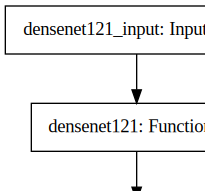

In [ ]:
plot_model(Densenet_121, to_file='Densenet_121.png')
SVG(model_to_dot(Densenet_121).create(prog='dot', format='svg'))

In [ ]:
%%time
# Fitting the Densenet_121
dense121 = Densenet_121.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
25/25 [==============================] - 19s 352ms/step - loss: 0.4853 - accuracy: 0.9193 - val_loss: 0.5715 - val_accuracy: 0.9750
Epoch 2/30
25/25 [==============================] - 6s 247ms/step - loss: 0.0437 - accuracy: 0.9915 - val_loss: 1.4803 - val_accuracy: 0.8750
Epoch 3/30
25/25 [==============================] - 6s 250ms/step - loss: 0.0455 - accuracy: 0.9891 - val_loss: 1.0232 - val_accuracy: 0.9650
Epoch 4/30
25/25 [==============================] - 6s 251ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3067 - val_accuracy: 0.9850
Epoch 5/30
25/25 [==============================] - 6s 249ms/step - loss: 0.0064 - accuracy: 0.9966 - val_loss: 0.0096 - val_accuracy: 0.9950
Epoch 6/30
25/25 [==============================] - 6s 247ms/step - loss: 7.0477e-04 - accuracy: 0.9999 - val_loss: 0.0541 - val_accuracy: 0.9950
Epoch 7/30
25/25 [==============================] - 6s 246ms/step - loss: 0.0252 - accuracy: 0.9975 - val_loss: 1.6110 - val_accuracy: 0.8350
E

## Evaluating the dense121

In [ ]:
# Evaluating the dense121:
%%time
Densenet_121.evaluate(Xtest_norm,ytest,verbose= 1)

4/4 [==============================] - 1s 409ms/step - loss: 1.1416e-04 - accuracy: 1.0000
CPU times: user 925 ms, sys: 363 ms, total: 1.29 s
Wall time: 1.42 s


[0.0001141591856139712, 1.0]

## Accuracy and Loss Plot

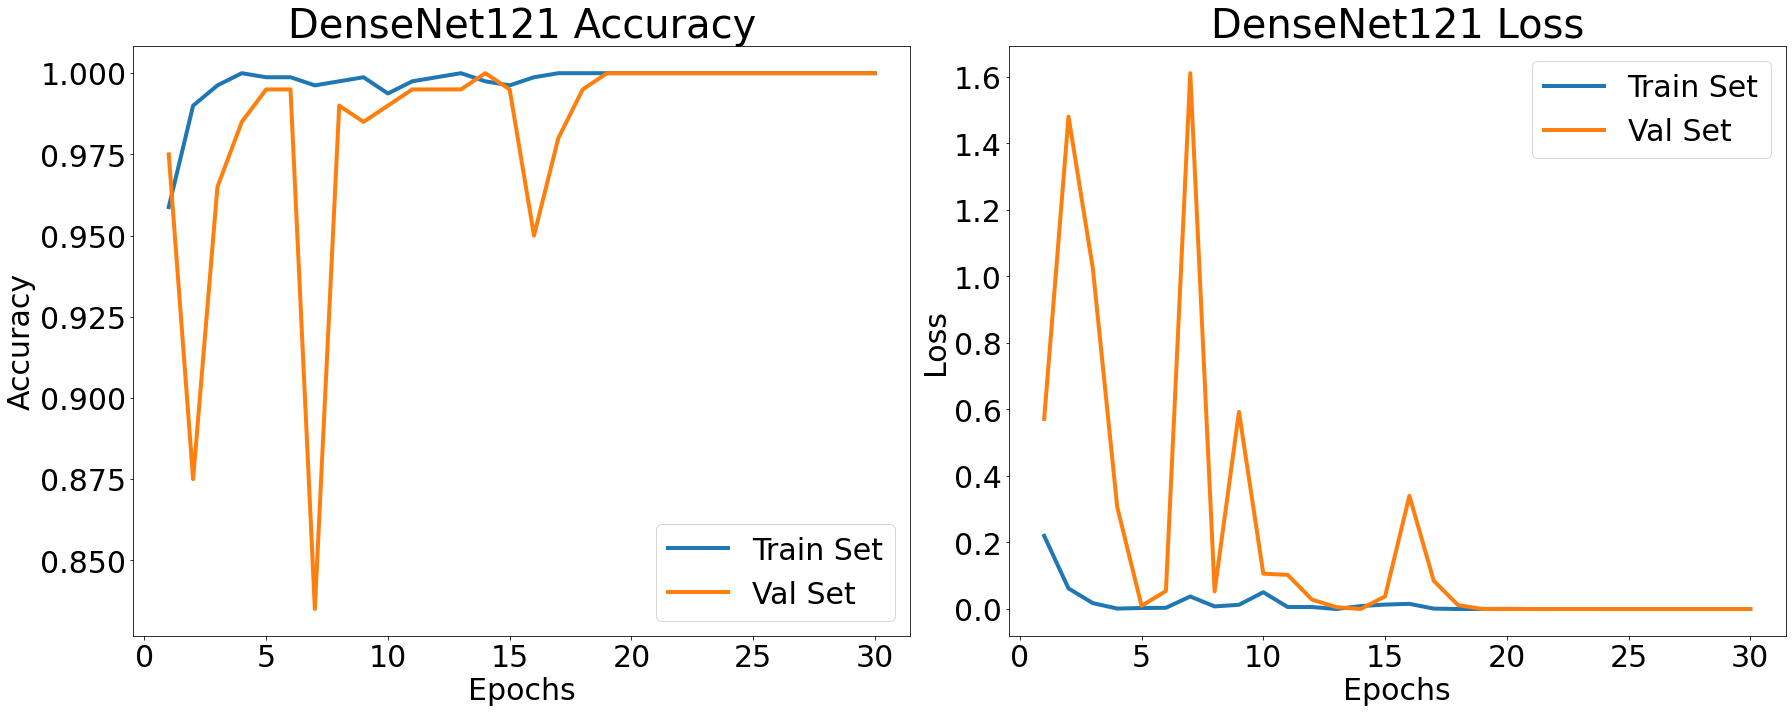

In [ ]:
# plot the model accuracy and loss for the training and the validating set.


# plot model performance
acc = dense121.history['accuracy']
val_acc = dense121.history['val_accuracy']
loss = dense121.history['loss']
val_loss = dense121.history['val_loss']
epochs_range = range(1, len(dense121.epoch) + 1)

plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_acc, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('DenseNet121 Accuracy',fontsize=40)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_loss, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('DenseNet121 Loss',fontsize=40)

plt.tight_layout()
plt.show()

## Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 2s 124ms/step


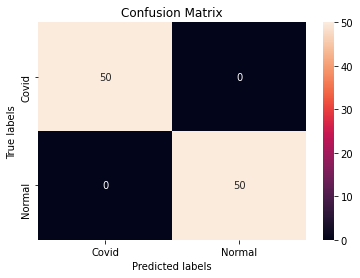

In [ ]:
pred  = Densenet_121.predict_classes(Xtest_norm,verbose= 1)

import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);

## Performance Evaluation of DenseNet

In [ ]:
print("Accuracy:", metrics.accuracy_score(ytest, pred))
print("Precision:", metrics.precision_score(ytest, pred))
print("Recall:", metrics.recall_score(ytest, pred))
print("F1 Score:", metrics.f1_score(ytest, pred))
print("roc_auc_score:", metrics.roc_auc_score(ytest, pred))


tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
print('TN: ', tn)
print('FP: ', fp)
print('FN: ', fn)
print('TP: ', tp)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
roc_auc_score: 1.0
TN:  50
FP:  0
FN:  0
TP:  50


## ROC

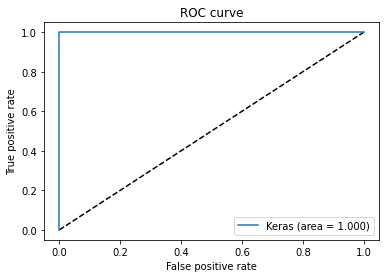

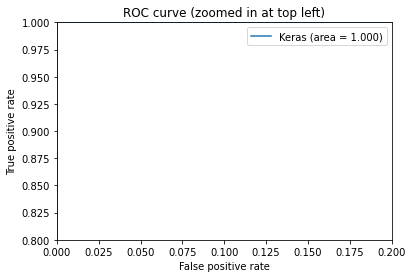

In [ ]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = Densenet_121.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## Precision Recall Curve

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=1.000 auc=1.000


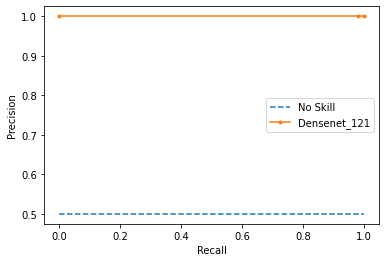

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = Densenet_121.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Densenet_121')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

normal = 1 , covid19 = 0


# VGG-16

In [ ]:
""" USE VGG-16"""
from tensorflow.keras.applications import VGG16
vgg = VGG16(input_shape=(size,size,3),pooling='max', include_top=False, weights='imagenet')


58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_16 = Sequential()

vgg_16.add(DenseNet)
vgg_16.add(Flatten())
# vgg_16.add(Dropout(0.5))
vgg_16.add(Dense(1, activation='sigmoid'))
vgg_16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg_16.summary()

vgg_16.layers[0].trainable = False

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 5,454,273
Non-trainable params: 1,584,256
_________________________________________________________________


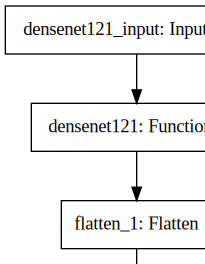

In [ ]:
plot_model(vgg_16, to_file='vgg_16.png')
SVG(model_to_dot(vgg_16).create(prog='dot', format='svg'))

In [ ]:
%%time
# Fitting the vgg_16
vgg_16_history = vgg_16.fit(X_train_norm,y_train,epochs = 30,validation_data=(X_valid_norm,y_valid),verbose = 1)

Epoch 1/30
25/25 [==============================] - 16s 318ms/step - loss: 0.1443 - accuracy: 0.9428 - val_loss: 0.2044 - val_accuracy: 0.9900
Epoch 2/30
25/25 [==============================] - 6s 246ms/step - loss: 0.0823 - accuracy: 0.9881 - val_loss: 6.1669 - val_accuracy: 0.9100
Epoch 3/30
25/25 [==============================] - 6s 247ms/step - loss: 0.0265 - accuracy: 0.9951 - val_loss: 18.2599 - val_accuracy: 0.8300
Epoch 4/30
25/25 [==============================] - 6s 251ms/step - loss: 0.0235 - accuracy: 0.9883 - val_loss: 1.6071 - val_accuracy: 0.9550
Epoch 5/30
25/25 [==============================] - 6s 252ms/step - loss: 7.1714e-05 - accuracy: 1.0000 - val_loss: 0.6345 - val_accuracy: 0.9850
Epoch 6/30
25/25 [==============================] - 6s 250ms/step - loss: 0.0017 - accuracy: 0.9993 - val_loss: 0.1677 - val_accuracy: 0.9850
Epoch 7/30
25/25 [==============================] - 6s 248ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0421 - val_accuracy: 0.9950


## Evaluating the vgg_16

In [ ]:
# Evaluating the vgg_16:
%%time
vgg_16.evaluate(Xtest_norm,ytest,verbose= 1)

4/4 [==============================] - 0s 85ms/step - loss: 3.3472e-04 - accuracy: 1.0000
CPU times: user 270 ms, sys: 46.7 ms, total: 316 ms
Wall time: 480 ms


[0.00033472070936113596, 1.0]

## Accuracy and Loss Plot

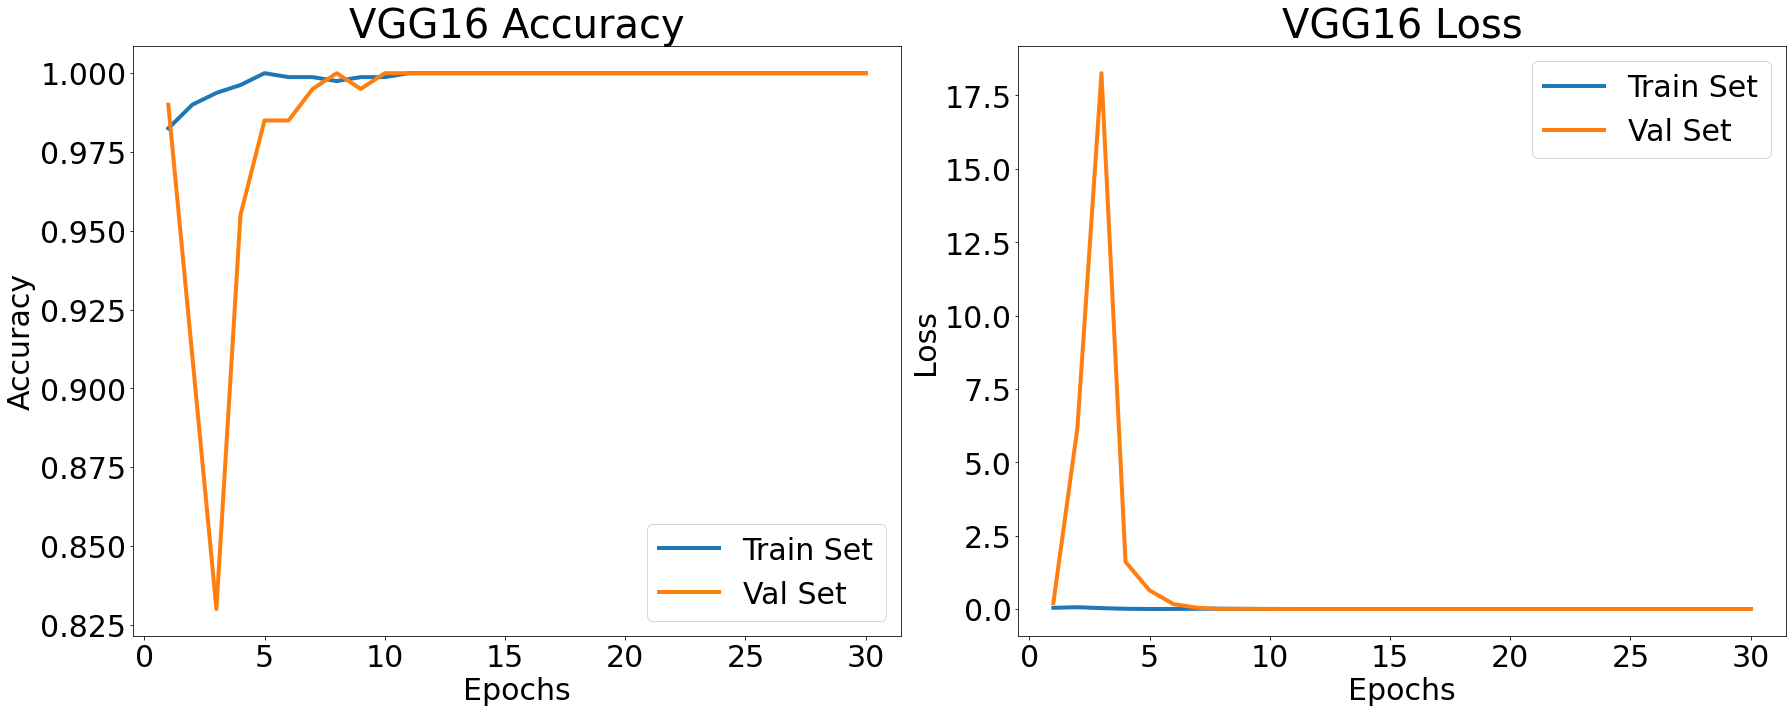

In [ ]:
# plot the model accuracy and loss for the training and the validating set.


# plot model performance
acc = vgg_16_history.history['accuracy']
val_acc = vgg_16_history.history['val_accuracy']
loss = vgg_16_history.history['loss']
val_loss = vgg_16_history.history['val_loss']
epochs_range = range(1, len(vgg_16_history.epoch) + 1)

plt.figure(figsize=(25,10))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_acc, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('VGG16 Accuracy',fontsize=40)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set',linewidth=4)
plt.plot(epochs_range, val_loss, label='Val Set',linewidth=4)
plt.legend(loc="best",fontsize=30)
plt.xlabel('Epochs',fontsize=30)
plt.ylabel('Loss',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title('VGG16 Loss',fontsize=40)

plt.tight_layout()
plt.show()

## Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4/4 [==============================] - 2s 125ms/step


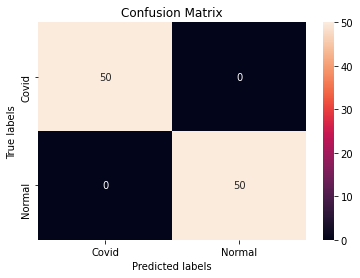

In [ ]:
pred  = vgg_16.predict_classes(Xtest_norm,verbose= 1)

import seaborn as sns

cm = confusion_matrix(ytest, pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Covid', 'Normal']); ax.yaxis.set_ticklabels(['Covid', 'Normal']);

## Performance Evaluation of VGG16

In [ ]:
print("Accuracy:", metrics.accuracy_score(ytest, pred))
print("Precision:", metrics.precision_score(ytest, pred))
print("Recall:", metrics.recall_score(ytest, pred))
print("F1 Score:", metrics.f1_score(ytest, pred))
print("roc_auc_score:", metrics.roc_auc_score(ytest, pred))


tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
print('TN: ', tn)
print('FP: ', fp)
print('FN: ', fn)
print('TP: ', tp)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
roc_auc_score: 1.0
TN:  50
FP:  0
FN:  0
TP:  50


## ROC

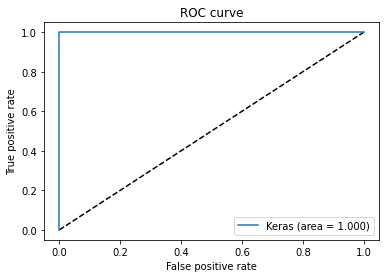

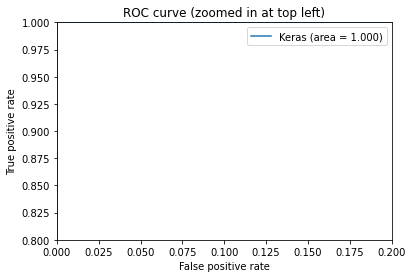

In [ ]:
# ROC
from sklearn.metrics import roc_curve
y_pred_keras = vgg_16.predict(Xtest_norm).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(ytest, y_pred_keras)

# AUC
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

## Precision Recall Curve

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


Logistic: f1=1.000 auc=1.000


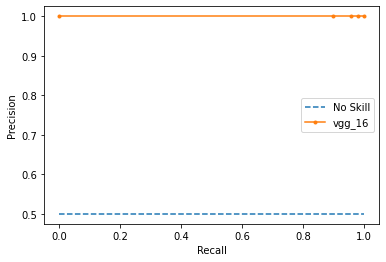

In [ ]:



from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

prob = vgg_16.predict_proba(Xtest_norm)

lr_precision, lr_recall, _ = precision_recall_curve(ytest, prob)
lr_f1, lr_auc = f1_score(ytest, pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(ytest[ytest==1]) / len(ytest)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='vgg_16')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
print('normal = 1 , covid19 = 0')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        50
         1.0       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

normal = 1 , covid19 = 0


# CLAHE 

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

  
# Reading the image from the present directory
image = cv2.imread("/content/1-s2.0-S2214250920300706-gr5_lrg.jpg")
# Resizing the image for compatibility
image = cv2.resize(image, (256, 256))
  
# The initial processing of the image
# image = cv2.medianBlur(image, 3)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# The declaration of CLAHE 
# clipLimit -> Threshold for contrast limiting

clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(image_bw)
cv2_imshow(final_img)

rgb = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)
rgb.shape

# Wavelet Transform

In [ ]:
import numpy as np
import pywt
import pywt.data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/lena.bmp') # Reading the Image

coeffs2 = pywt.dwt2(img, 'db3', mode = 'periodization') # 1 level DWT
cA, (cH, cV, cD) = coeffs2 # Extracting coeff2.

imgr = pywt.idwt2(coeffs2, 'db3', mode = 'periodization') # 1 level IDWT

# Plotting the wavelet coefficients
plt.figure(figsize = (30,30))

plt.subplot(2,2,1)
plt.imshow(cA, cmap=plt.cm.gray)
plt.title('cA: Approximation Coeff.', fontsize = 30)

plt.subplot(2,2,2)
plt.imshow(cH, cmap=plt.cm.gray)
plt.title('cH: Horizontal Detailed Coeff.', fontsize = 30)

plt.subplot(2,2,3)
plt.imshow(cV, cmap=plt.cm.gray)
plt.title('cV: Vertical Detailed Coeff.', fontsize = 30)

plt.subplot(2,2,4)
plt.imshow(cD, cmap=plt.cm.gray)
plt.title('cD: Diagonal Detailed Coeff.', fontsize = 30)

plt.show()

# plotting Reconstructed Image
plt.imshow(imgr, cmap = plt.cm.gray)
plt.title('Reconstructed Image.', fontsize = 30)
